In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.palettes import Set2_6, Turbo256
colors = Set2_6
%matplotlib notebook

In [15]:
all_polyQs_deregulated = pd.read_csv('four_polyQs_deregulated.txt', sep = ',', header = 0)

# Table containing the 6 genes deregulated across all 4 polyQ lengths

In [16]:
all_polyQs_deregulated.head()

,gene,rtc_x,polyQs,deregs,lfc_exp_combine,smooth_exp_combine
0,arc,5.38,"['Q50', 'Q111', 'Q170', 'Q175']","DO,DO,DO,DO","-0.566490006,-0.44740146399999997,-0.794283946...","-0.5673688344011062,-0.4670855066903392,-0.825..."
1,bcas1,0.31,"['Q50', 'Q111', 'Q170', 'Q175']","UP,UP,UP,UP","0.267946703,0.501524989,0.542966207,0.759207813","0.2655616724802318,0.5097540295381504,0.549247..."
2,bmp1,2.20,"['Q50', 'Q111', 'Q170', 'Q175']","DO,DO,DO,DO","-0.493886182,-0.665443067,-0.64819854,-0.54732...","-0.6750555462762461,-0.6218714362385894,-0.688..."
3,shisa2,2.90,"['Q50', 'Q111', 'Q170', 'Q175']","DO,DO,DO,DO","-0.24724276899999997,-0.773589104,-1.948878312...","-0.2478669805637159,-0.7710475733883834,-1.945..."
4,stk33,-3.04,"['Q50', 'Q111', 'Q170', 'Q175']","UP,UP,UP,UP","0.277558925,0.47213545,1.089462207,1.317531341","0.2876607172525781,0.4531224836630812,1.086027..."


# Plot to show the expression vs the polyQ length for the 6 genes in the table

<IPython.core.display.Javascript object>


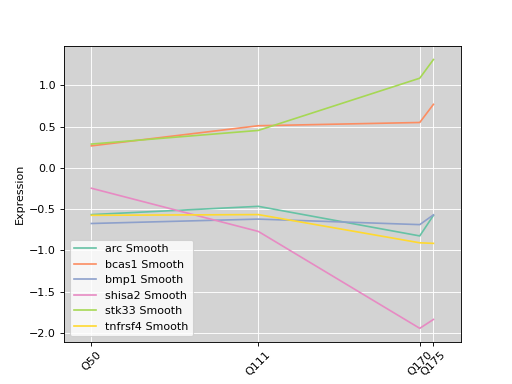

In [17]:
all_rtc = []
all_lfc = []
all_genes = []



fig = plt.figure()
ax = fig.gca( )
ax.patch.set_facecolor('#D3D3D3')

i = 0
for index, row in all_polyQs_deregulated.iterrows():
    
    
    color = colors[i]    
    x = []
    y = []    
    z = []
    
    gene = row['gene']
    rtc = row['rtc_x']
    all_rtc.append(rtc)
    lfc_values = row['lfc_exp_combine']
    smooth_values = row['smooth_exp_combine']
    polyQs = row['polyQs']
    y = [float(x) for x in smooth_values.split(',')]
    all_lfc.append(y)
    second_y_axis = [float(x) for x in lfc_values.split(',')]
    x = np.array([50, 111, 170, 175])
    z = np.full( 4, rtc)
    #print(z)
    
    plt.plot(x, y, color = color, label = ' '.join([gene, 'Smooth']))
    
    #plt.plot(x, second_y_axis, ls = '--',  color = color)
    
    all_genes.append(gene)
    
    i += 1
    
    

ax.set_ylabel('Expression')
ax.set_xlabel('PolyQ', labelpad = 10)
ax.set_xlim(40, 185)
ax.set_xticks(x)
ax.set_xticklabels(['Q50', 'Q111', 'Q170', 'Q175'], rotation = 45)
ax.grid(color='white', linestyle='solid')
ax.legend()



# Plot to show the polyQ length vs the expression for the 6 genes in the table

<IPython.core.display.Javascript object>


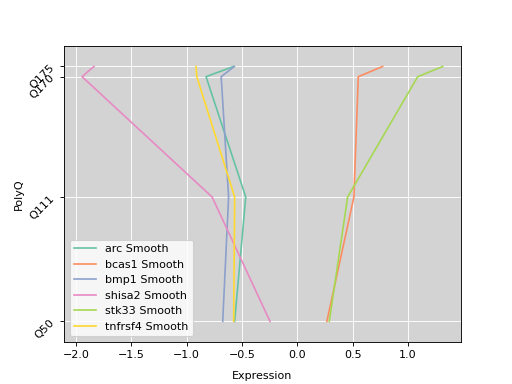

In [18]:
fig = plt.figure()
ax = fig.gca()
ax.patch.set_facecolor('#D3D3D3')

i = 0


for index, row in all_polyQs_deregulated.iterrows():
    
    
    color = colors[i]
    
    x = []
    y = []    
    z = []
    
    #print(row)
    gene = row['gene']
    rtc = row['rtc_x']
    all_rtc.append(rtc)
    lfc_values = row['lfc_exp_combine']
    smooth_values = row['smooth_exp_combine']
    polyQs = row['polyQs']
    y = [float(x) for x in smooth_values.split(',')]
    all_lfc.append(y)
    second_y_axis = [float(x) for x in lfc_values.split(',')]
    #print(gene, y)
    x = np.array([50, 111, 170, 175])
    z = np.full( 4, rtc)
    #print(z)
    
    plt.plot(y, x, color = color, label = ' '.join([gene, 'Smooth']))
    
    #plt.plot(x, second_y_axis, ls = '--',  color = color)
    
    all_genes.append(gene)
    
    i += 1
    
    

ax.set_ylabel('PolyQ')
ax.set_xlabel('Expression', labelpad = 10)
ax.set_ylim(40, 185)
ax.set_yticks(x)
ax.set_yticklabels(['Q50', 'Q111', 'Q170', 'Q175'], rotation = 45)
ax.grid(color='white', linestyle='solid')
ax.legend()




# 3D plot to show the expression against the polyQ length for the RTC of each gene

<IPython.core.display.Javascript object>


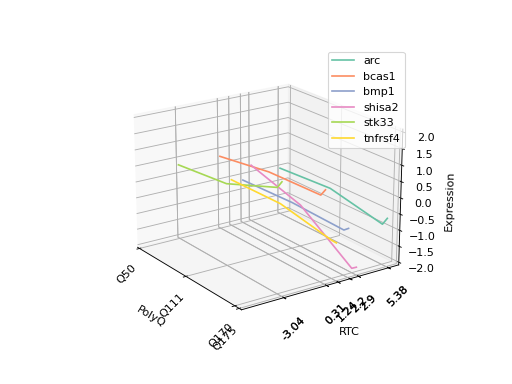

In [21]:
suffix_array = ['Q50', 'Q111', 'Q170', 'Q175'] 

fig = plt.figure()
ax = fig.gca(projection='3d')

i = 0
for z, lfc, c, g in zip(all_rtc, all_lfc, colors, all_genes):
    
    ax.plot(x, lfc, zs = z, zdir = 'y', label = all_genes[i], color = c)
    i += 1
    #verts.append(list(zip(x, y)))

ax.set_xlabel('PolyQ', labelpad = 10)
ax.set_xlim3d(50, 175)
ax.set_xticks(x)
ax.set_xticklabels(suffix_array, rotation = 45)

ax.set_ylabel('RTC', labelpad = 10)
ax.set_ylim3d(-6, 6)
ax.set_yticks(all_rtc)
ax.set_yticklabels(all_rtc, rotation = 45)

ax.set_zlabel('Expression')
ax.set_zlim3d(-2, 2)
ax.legend()
ax.view_init(elev=20., azim=-35)

# 3D plot to show the polyQ length against the expression for the RTC of each gene

<IPython.core.display.Javascript object>


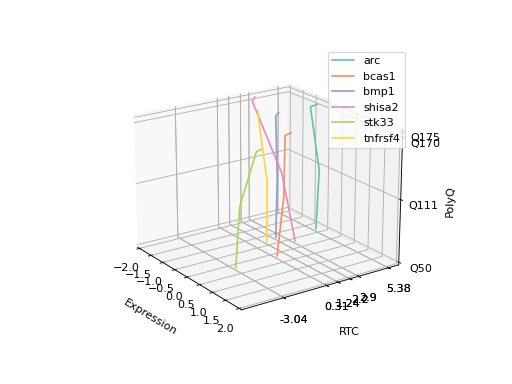

In [23]:
fig = plt.figure()
ax = fig.gca(projection='3d')

i = 0
for z, lfc, c, g in zip(all_rtc, all_lfc, colors, all_genes):
    
    ax.plot(lfc, x , zs = z, zdir = 'y', label = all_genes[i], color = c)
    i += 1

ax.set_xlabel('Expression', labelpad = 10)
ax.set_xlim3d(-2, 2)

ax.set_ylabel('RTC', labelpad = 10)
ax.set_ylim3d(-6, 6)
ax.set_yticks(all_rtc)
ax.set_yticklabels(all_rtc)

ax.set_zlabel('PolyQ')
ax.set_zlim3d(50, 175)
ax.set_zticks(x)
ax.set_zticklabels(suffix_array)


ax.legend()
ax.view_init(elev=20., azim=-35)